### housekeeping

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
cned = pd.read_csv('data/cned/cned.csv')
sned = pd.read_csv('data/sned/sned.csv')
mn = pd.read_csv('data/mn/1m2017.csv')
sim1 = pd.read_csv('data/mn/1b2015.csv')
cned.dropna(inplace=True)
sned.dropna(inplace=True)
sim1.dropna(inplace=True)
mn.dropna(inplace=True)

# Human capital skills for jobs in the next generation

Increasingly, highly demanded jobs require a diverse set of human capital skills: team-building, mindfulness, continous learning (see an example from [United Nations](https://careers.un.org/lbw/attachments/competencies_booklet_en.pdf)). Moreover, jobs in demand are linked to fast growing higher education programs, which in turn have stricter entry requirements, measured by standarized tests (like SAT or equivalent).  


Here is an example from Chile, showing the relationship between mean standarized college entry scores in Chile (PSU) and enrollement size for each program across all areas of higher education between 2006 and 2019 (excludes programs without test requirements). Programs with larger enrollment also have higher admision standards, particularly for STEM, Business and Law.


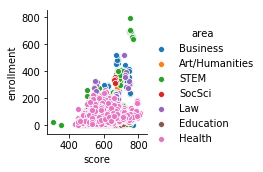

In [7]:
cned.rename(columns={"puntaje": "score", "ingreso2": "enrollment"}, inplace=True)
scatter1 = sns.pairplot(x_vars="score", y_vars="enrollment", data=cned, hue="area")


This complex mix of capacities, required to be successful in atractive career paths, demand an active human skill accumulation process during the school years. Extensive evidence indicates that active learning at school requires a mix of socio-emotional skills and physical health. The [OCDE](https://read.oecd-ilibrary.org/social-issues-migration-health/the-heavy-burden-of-obesity_67450d67-en#page1) estimates suggest that normal weight children are 13% more likely to perform well at school, relative to their less healthy peers. Moreover, both physical health and socio-emotional skills are intimately connected. [Research](https://www.journals.uchicago.edu/doi/abs/10.1086/692016?journalCode=jhc) shows that obese children tend to accumulate less socio-emotional skills over time. 

Again, an example from Chile can be informative. Here is a binned plot showing the obesity prevalence at high school level by average school learning performace in 2015-2017 for voucher schools (each observation in the data is a school). School performance is measured by the average standarized scores (0-100) across all disciplines (e.g. math, languague) and school levels (primary, middle, high). Overall, voucher schools with high effectiveness (i.e. higher average learning) also have a lower proportion of obese students.  

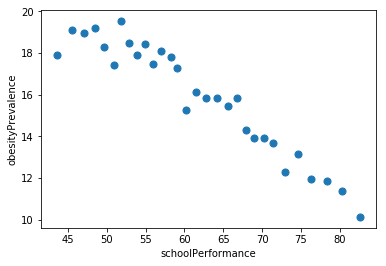

In [8]:
mn['obesityPrevalence'] = ((mn['onino'] + mn['onina']) / mn['total']) * 100
mn.set_index('idrbd')
mn['idrbd'] = mn['idrbd'].astype(np.int64)
sned.rename(columns={"efectivr": "schoolPerformance"}, inplace=True)
mergedData = pd.merge(mn, sned, on='idrbd', how='inner')

#scatterplot
#plt.scatter(mergedData['schoolPerformance'], mergedData['obesityPrevalence'])

#binned scatterplot
bin1 = sns.regplot('schoolPerformance', 'obesityPrevalence', 
            data=mergedData, x_bins=30, ci=None, fit_reg=False)


We face a vicious cycle: stressful environments favor weight gain among children, which in turn affects their socio-emotional development, making them less likely to adopt healthy behaviors.

# Monitoring early human capital skills 

Given the importance of early human capital accumulation from a life-cycle perspective, we would want to track and support disadvantage groups once they enter the school system. Fortunately, there are several ways to collect information once children are at school. For example, in many countries the School Meal Programs provide an unique opportunity to collect health and socio-economic information of each student.

Our solution is founded on exploiting the potential of such routine administrative data at the PK-12 ages. For example, data is periodically collected for all students in specific grades attending public and voucher schools in Chile. 

Our toolkit is based on a simple human capital framework that formalize the statistical assumptions needed for a country-wide model that allows to predict the future path for children's human capital accumulation, based on the longitudinal data available from multiple cohorts. Our solution not only can forecast future risks at the local level (e.g. district), but also allow to predict and evaluate the impact of interventions. The toolkit is based on a combination of theoretical premises as well as statistical foundations, using simple Python tools.

Below there are a few simple examples of functionality based on simulated data from Chile, representing 10% of total enrollment in 1st grade of primary school.

In [ ]:
#visualization


In [ ]:
#factor analysis


In [ ]:
#statistical manipulation


In [ ]:
#geodata visualization
